# Importing all the necessery Library

In [1]:
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)
pd.options.mode.chained_assignment = None
%matplotlib inline 
import csv
# for data visualisation and statistical analysis
##import numpy as np
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
plt.rc("font", size=14)
plt.rcParams['figure.figsize'] = (8, 5)

from sklearn import model_selection

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Load the dataset
df = pd.read_csv("bank-full.csv")
# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# check dataset size
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


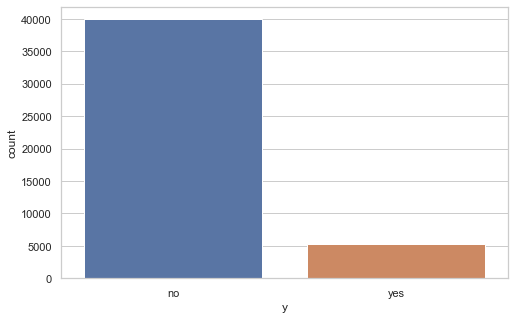

In [5]:
# visualistaion where no is not subscribed a term deposit and 1 is subscribed a term deposit
sns.countplot(x="y",data=df)

In [6]:
# lets check in numer how many clint subscribed a term deposit
df.groupby("y").size().sort_values

<bound method Series.sort_values of y
no     39922
yes     5289
dtype: int64>

In [7]:
# display job title for customer
df.groupby("job").size().sort_values

<bound method Series.sort_values of job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64>

In [8]:
#lets find the transaction different day within same customer
#Timebtworders = df.sort_values(['default','y']).groupby('default')['y']

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002434A6D5D30>,
      dtype=object)

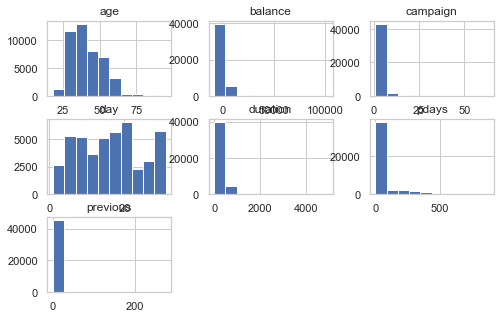

In [10]:
df.hist()

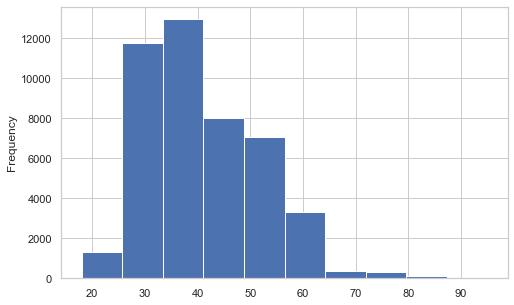

In [11]:
# MONTHS_SINCE_LAST_PROM_RESP distribution
df["age"].plot.hist()

In [12]:
#df["AGE"]= pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80','80-100']})

#def split_mean(x):
   # split_list = x.split('-')
   # mean = (float(split_list[0])+float(split_list[1]))/2
   # return mean


In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
#another way
df['TARGET'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
#another way
df['DEFAULT'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
#another way
df['HOUSING'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
#another way
df['LOAN'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,TARGET,DEFAULT,HOUSING,LOAN
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0,0,0,0


In [16]:
df.drop(["y","default","housing","loan"],axis=1, inplace=True)

In [17]:
df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,TARGET,DEFAULT,HOUSING,LOAN
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,0,0,1,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,0,0,1,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,0,0,1,1
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,0,0,1,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,0,0,0,0


In [18]:
df.groupby("poutcome").size()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

In [19]:
df.groupby("previous").size()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
dtype: int64

In [20]:
df.groupby("poutcome").size()

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

In [21]:
#separate variables into numerical and categorical data
#numeric data
numeric = df.select_dtypes(include=[np.number])

#categorical data
cat = df.select_dtypes(exclude=[np.number])

print("There are {} numeric and {} categorical columns in the df data".
     format(numeric.shape[1],cat.shape[1]))

There are 11 numeric and 6 categorical columns in the df data


In [22]:
# below columns are numerical columns
numerical = df[df.columns[df.dtypes!=object]]
numerical.describe()

,age,balance,day,duration,campaign,pdays,previous,TARGET,DEFAULT,HOUSING,LOAN
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.018027,0.555838,0.160226
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.133049,0.496878,0.366820
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# below columns are categorical columns
categorical = df[df.columns[df.dtypes==object]]
categorical.describe()

,job,marital,education,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9732,27214,23202,29285,13766,36959


In [24]:
#one hot encoding(will be one colum)
# converting categorical data to numerical by using dummies
cat_dummies = pd.get_dummies(categorical, categorical.columns, drop_first = False)
cat_dummies.head() # display 5 rows

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
# concating numerical colums and cat_dummies columns
data = pd.concat([numerical,cat_dummies],axis=1)

In [26]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,TARGET,DEFAULT,HOUSING,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [27]:
data.shape

(45211, 49)

In [28]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'TARGET', 'DEFAULT', 'HOUSING', 'LOAN', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Data Visualisation

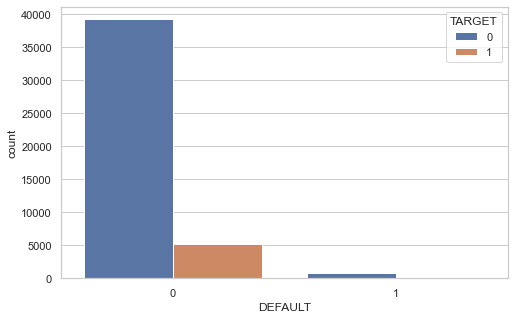

In [29]:
sns.countplot(x="DEFAULT",hue="TARGET",data=data)

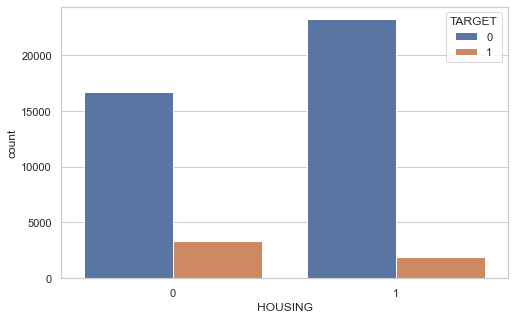

In [30]:
sns.countplot(x="HOUSING",hue="TARGET",data=data)

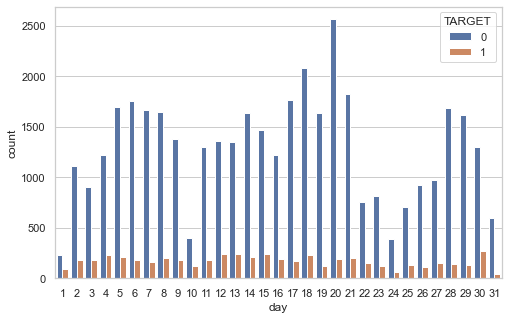

In [31]:
sns.countplot(x="day",hue="TARGET",data=data)

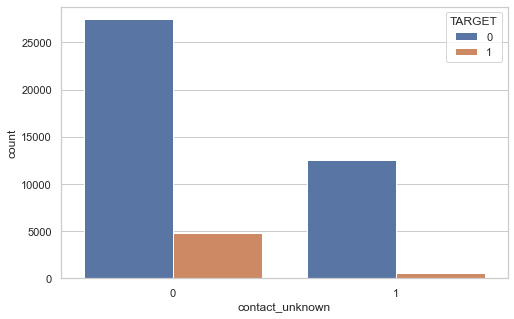

In [32]:
sns.countplot(x="contact_unknown",hue="TARGET",data=data)

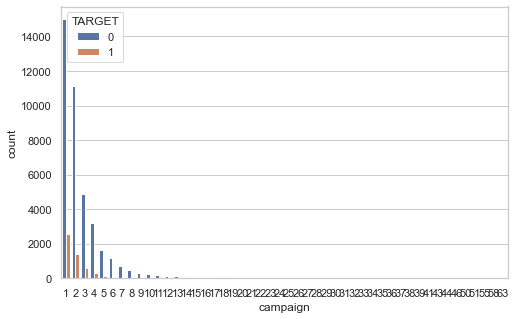

In [33]:
sns.countplot(x="campaign",hue="TARGET",data=data)

Text(0, 0.5, 'Frequency')

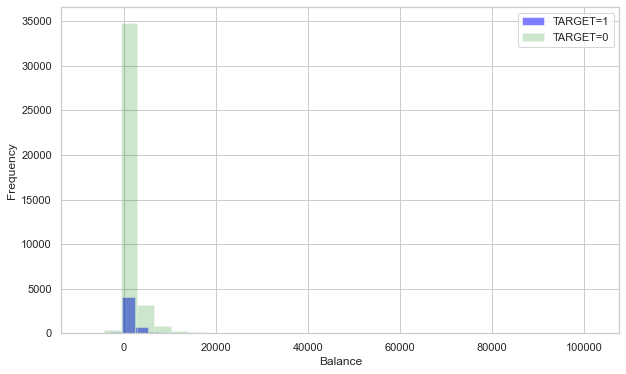

In [34]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['balance'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['balance'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

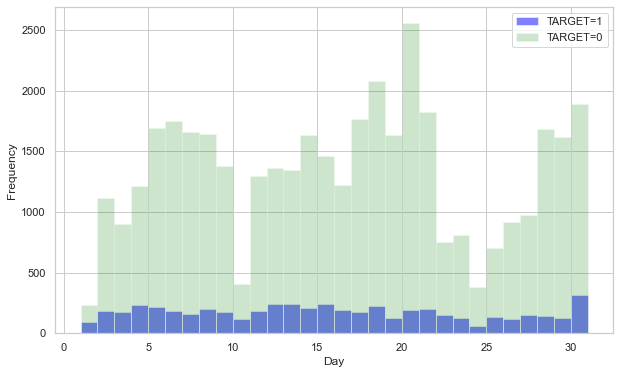

In [35]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['day'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['day'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

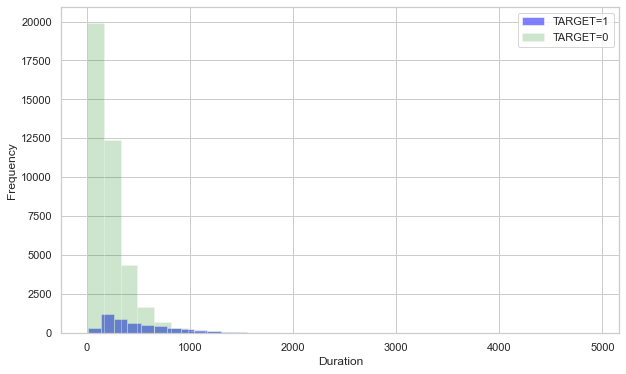

In [36]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['duration'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['duration'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Duration')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

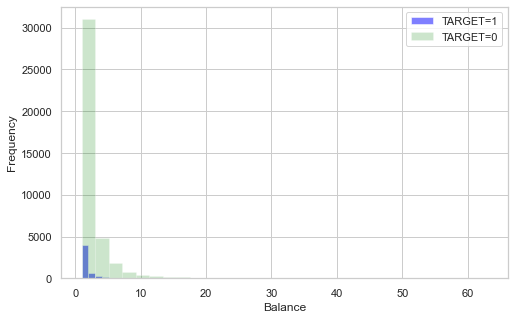

In [37]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(8,5))
data[data['TARGET']==1]['campaign'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['campaign'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

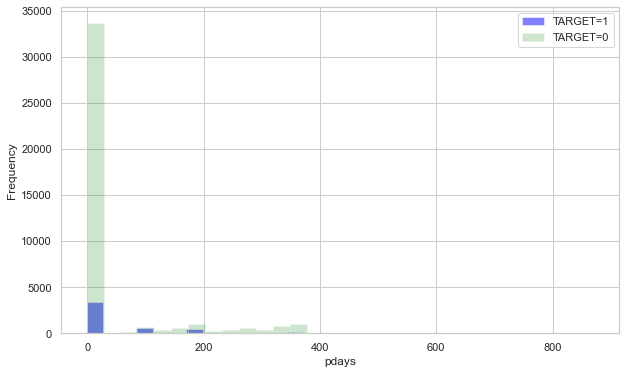

In [38]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['pdays'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['pdays'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('pdays')
plt.ylabel('Frequency')

In [39]:
data.groupby("pdays").size()

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Length: 559, dtype: int64

In [40]:
data.groupby("contact_unknown").size()

contact_unknown
0    32191
1    13020
dtype: int64

Text(0, 0.5, 'Frequency')

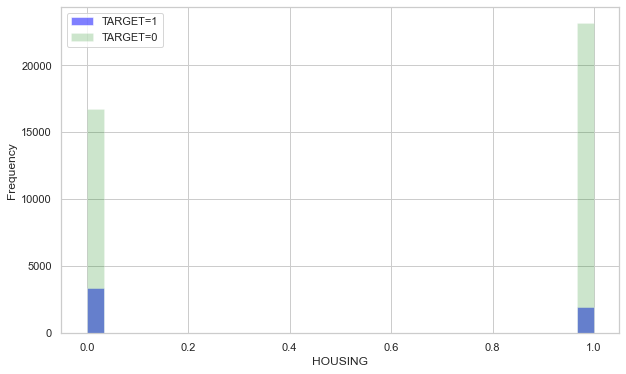

In [41]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['HOUSING'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['HOUSING'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('HOUSING')
plt.ylabel('Frequency')

In [42]:
#Maritalstatus breakdown for the churn rate
data.groupby('HOUSING').TARGET.mean()

HOUSING
0    0.167024
1    0.077000
Name: TARGET, dtype: float64

Text(0, 0.5, 'Frequency')

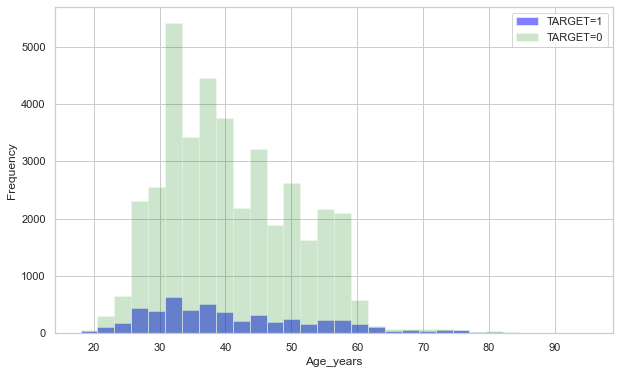

In [43]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['age'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Age_years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

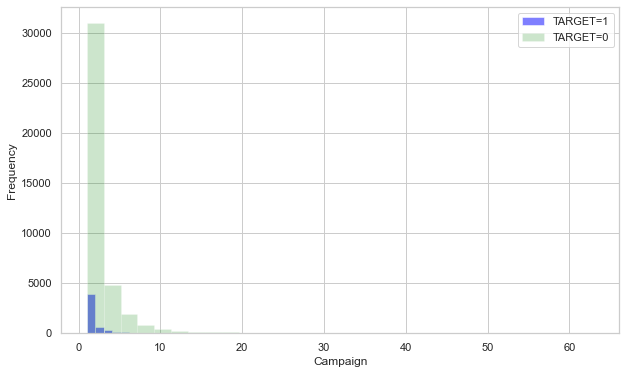

In [44]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['campaign'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['campaign'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Campaign')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

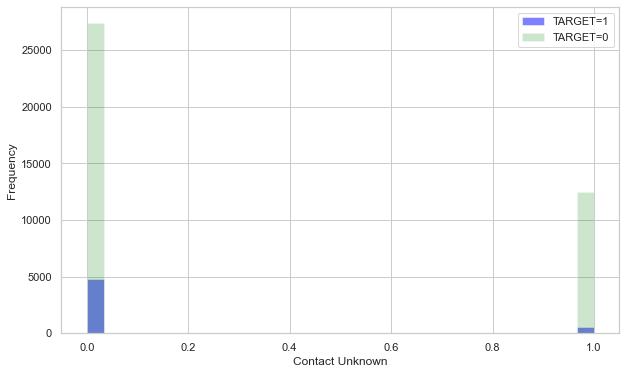

In [45]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['contact_unknown'].hist(alpha=0.5,color='blue',
                                              bins=30,label='TARGET=1')
data[data['TARGET']==0]['contact_unknown'].hist(alpha=0.2,color='green',
                                              bins=30,label='TARGET=0')
plt.legend()
plt.xlabel('Contact Unknown')
plt.ylabel('Frequency')

# Lets do some Analysing
# Checking mean values for Subscrier and no-Subscriber

In [46]:

(data[data['TARGET']==1]['age']).mean()

41.670069956513515

In [47]:
(data[data['TARGET']==0]['age']).mean()

40.83898602274435

In [48]:
(data[data['TARGET']==1]['balance']).mean()

1804.2679145396105

In [49]:
(data[data['TARGET']==0]['balance']).mean()

1303.7149691899203

In [50]:
(data[data['TARGET']==1]['day']).mean()

15.158252977878616

In [51]:
(data[data['TARGET']==0]['day']).mean()

15.892289965432594

In [52]:
(data[data['TARGET']==1]['duration']).mean()

537.2945736434109

In [53]:
(data[data['TARGET']==0]['duration']).mean()

221.18280647262162

In [54]:
(data[data['TARGET']==1]['campaign']).mean()

2.1410474569861977

In [55]:
(data[data['TARGET']==0]['campaign']).mean()

2.8463503832473322

In [56]:
(data[data['TARGET']==1]['pdays']).mean()

68.70296842503309

In [57]:
(data[data['TARGET']==0]['pdays']).mean()

36.421371674765794

In [58]:
(data[data['TARGET']==1]['HOUSING']).mean()

0.36585365853658536

In [59]:
(data[data['TARGET']==0]['HOUSING']).mean()

0.5810079655327889

In [60]:
(data[data['TARGET']==1]['contact_unknown']).mean()

0.10020797882397428

In [61]:
(data[data['TARGET']==0]['contact_unknown']).mean()

0.31286007715044334

In [62]:
(data[data['TARGET']==1]['poutcome_success']).mean()

0.1849120816789563

In [63]:
(data[data['TARGET']==0]['poutcome_success']).mean()

0.013351034517308753

Text(0, 0.5, 'Frequency')

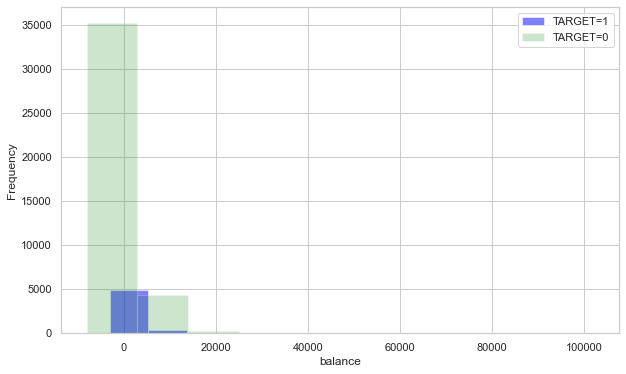

In [64]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['balance'].hist(alpha=0.5,color='blue',
                                              bins=10,label='TARGET=1')
data[data['TARGET']==0]['balance'].hist(alpha=0.2,color='green',
                                              bins=10,label='TARGET=0')
plt.legend()
plt.xlabel('balance')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

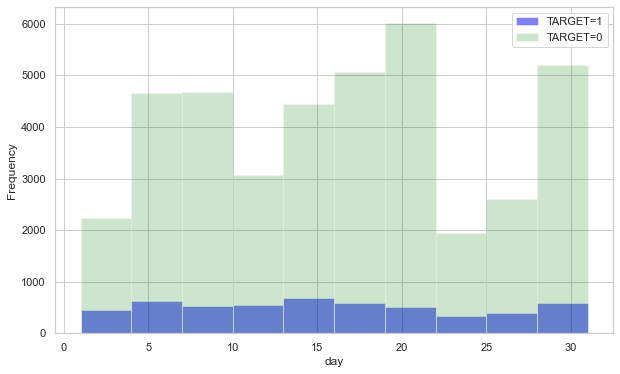

In [65]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['day'].hist(alpha=0.5,color='blue',
                                              bins=10,label='TARGET=1')
data[data['TARGET']==0]['day'].hist(alpha=0.2,color='green',
                                              bins=10,label='TARGET=0')
plt.legend()
plt.xlabel('day')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

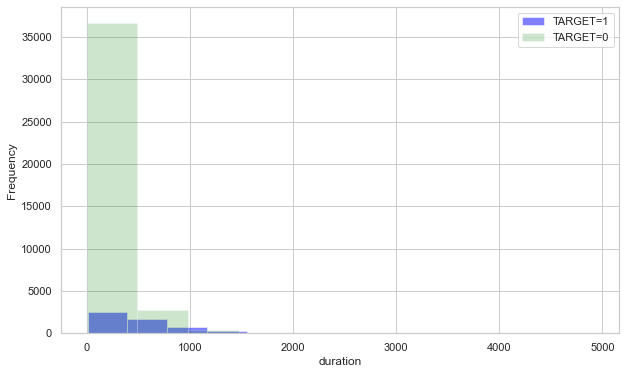

In [66]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
data[data['TARGET']==1]['duration'].hist(alpha=0.5,color='blue',
                                              bins=10,label='TARGET=1')
data[data['TARGET']==0]['duration'].hist(alpha=0.2,color='green',
                                              bins=10,label='TARGET=0')
plt.legend()
plt.xlabel('duration')
plt.ylabel('Frequency')

In [67]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'TARGET', 'DEFAULT', 'HOUSING', 'LOAN', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [68]:
#x = final_data[['SalesAmount_sum', 'OrderQuantity_sum', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'Tenure', 'Age', 'Churn']]
#sns.pairplot(data)

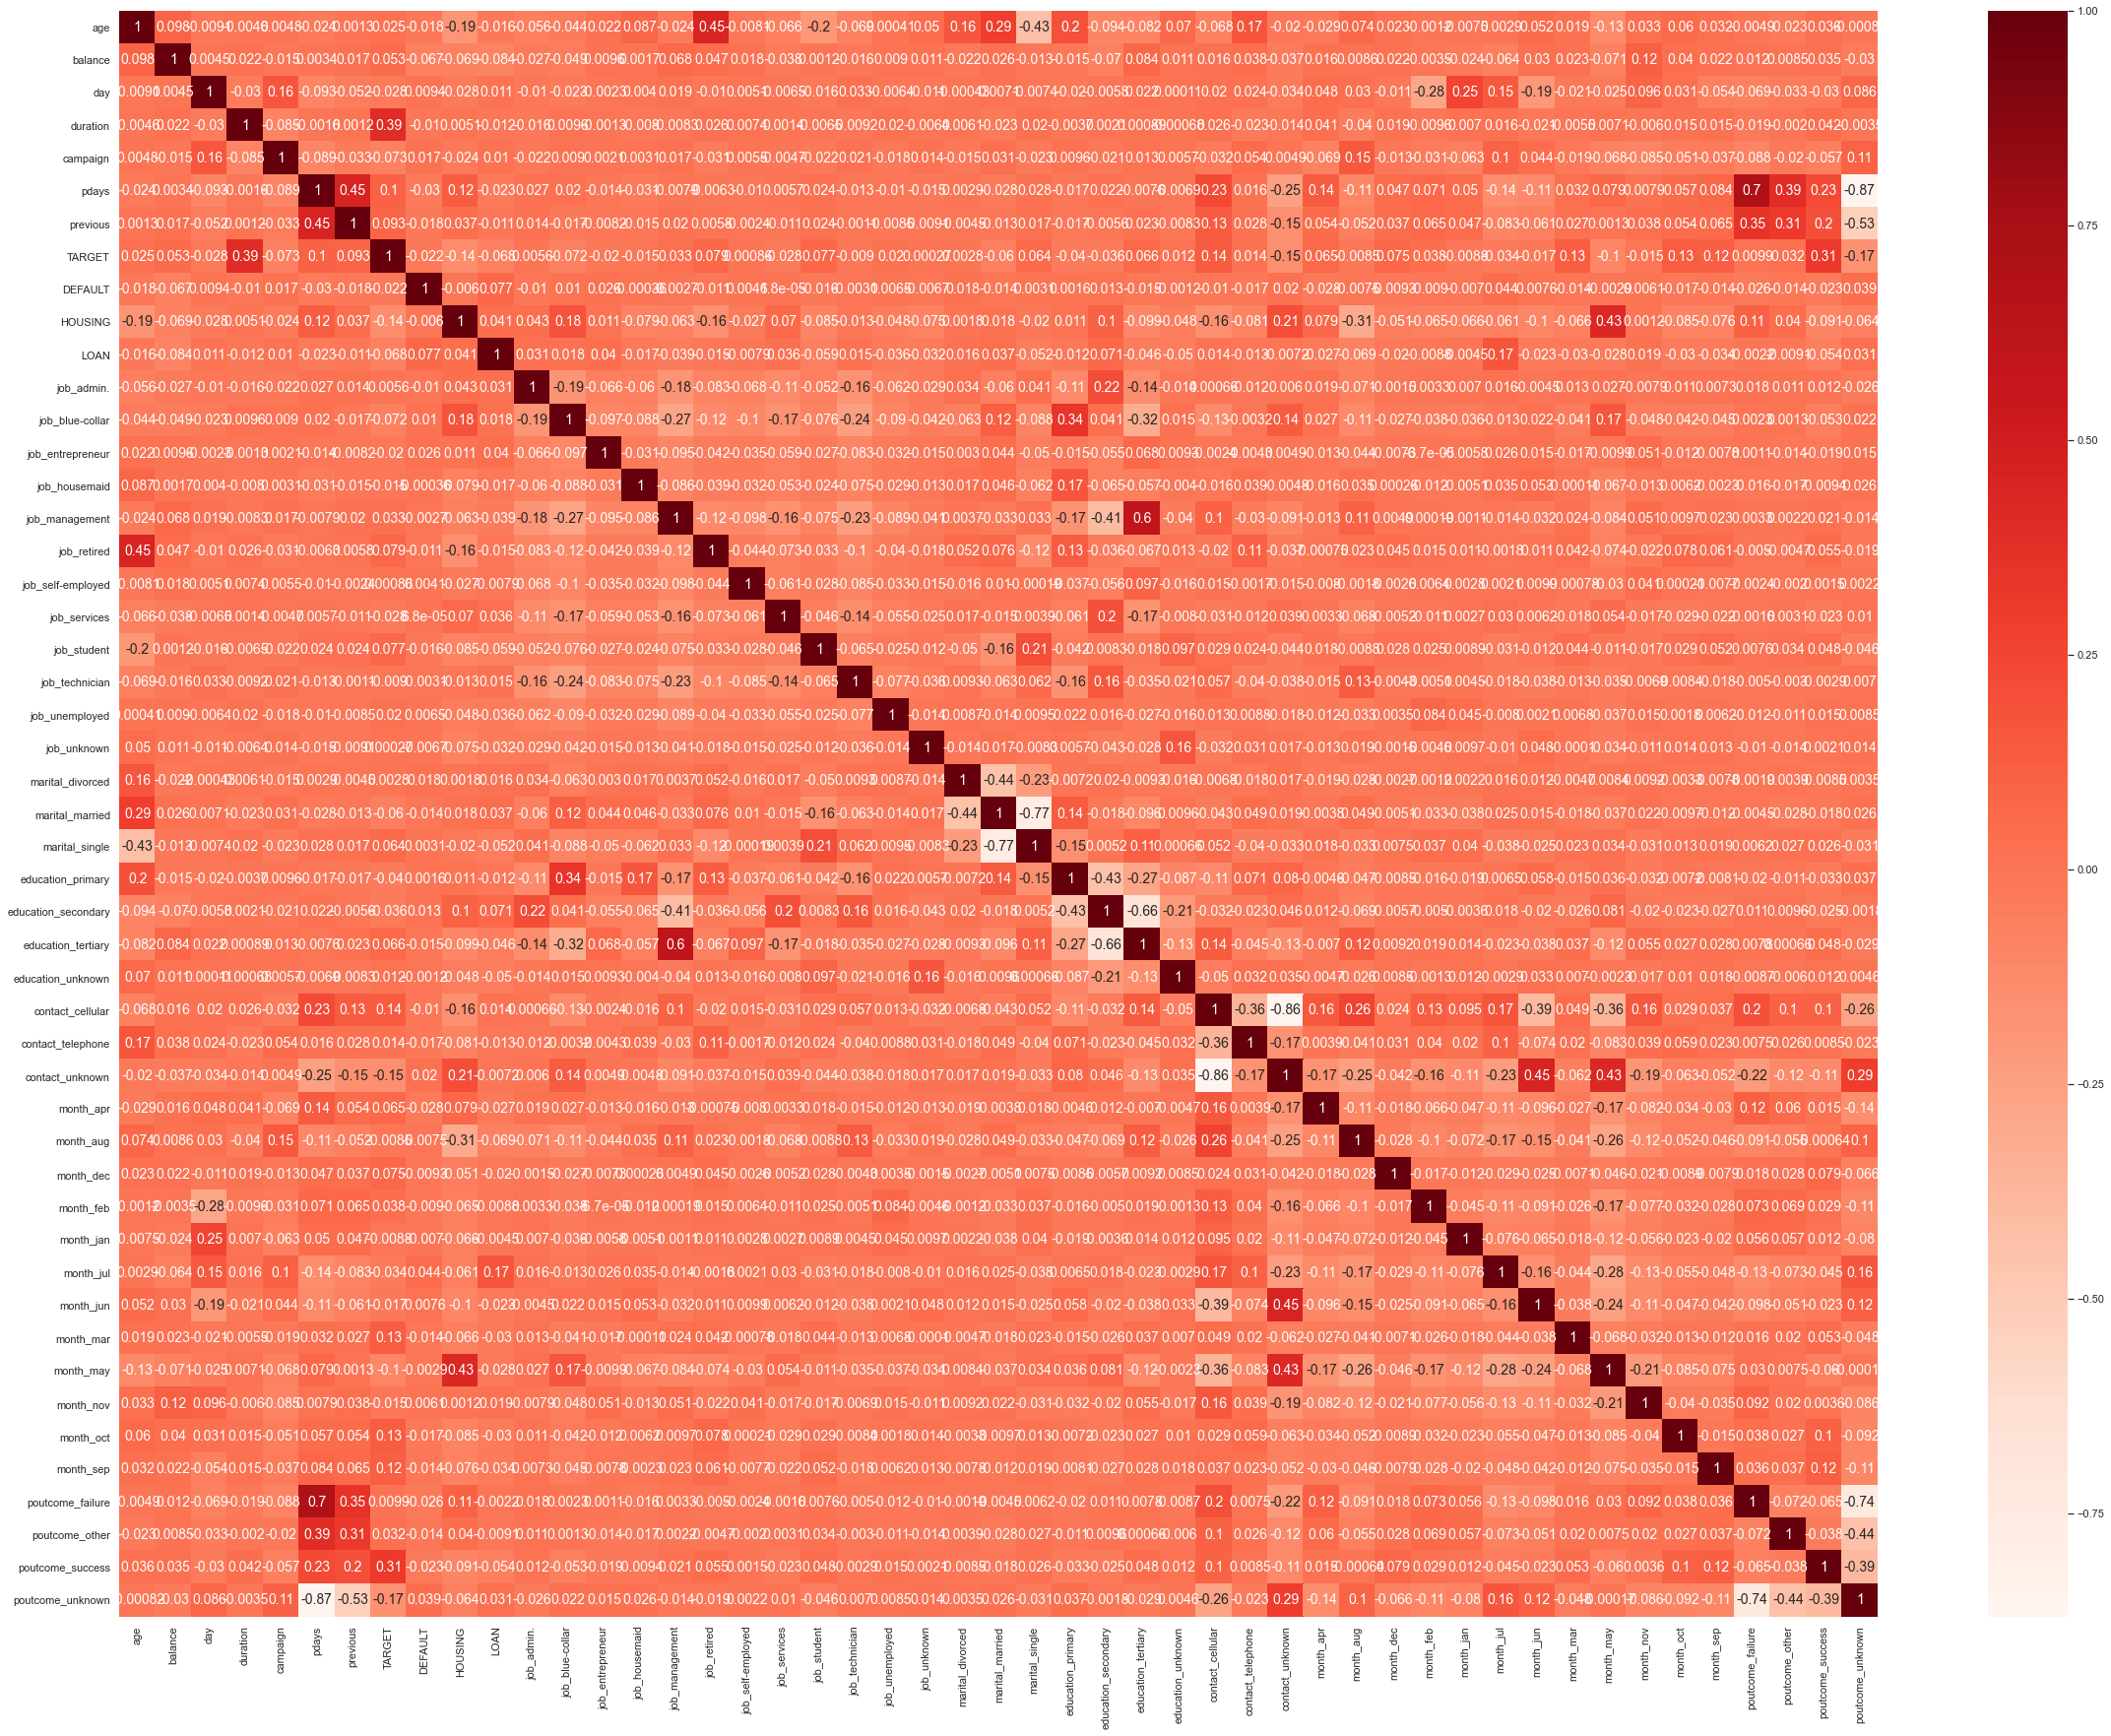

In [69]:
plt.figure(figsize=(40,30))
#%matplotlib inline
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

In [70]:
#sorting by top realtion
data.corr()["TARGET"].sort_values(ascending=False)

TARGET                 1.000000
duration               0.394521
poutcome_success       0.306788
contact_cellular       0.135873
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
month_apr              0.065392
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
poutcome_failure       0.009885
job_admin.             0.005637
marital_divorced       0.002772
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_no

In [71]:
#reviewing the no of records in the target field - Churn
data['TARGET'].value_counts()

0    39922
1     5289
Name: TARGET, dtype: int64

In [72]:
#Keep an hold out sample for scoring and deployment. 
#extract only churners
Target = data.loc[data['TARGET'] == 1] 
#Extract only first 6973 rows from Non churners
non_Target = data.loc[data['TARGET'] == 0]
#Score_data = final_data.loc[final_data['Churn'] == 0].tail(6000)

In [73]:
#Counting Churners
Target['TARGET'].value_counts()

1    5289
Name: TARGET, dtype: int64

In [74]:
#Counting Churners
non_Target['TARGET'].value_counts()

0    39922
Name: TARGET, dtype: int64

In [75]:
Score_data,Non_Target = train_test_split(non_Target,test_size=0.15,random_state=42)

In [76]:
Non_Target.shape

(5989, 49)

In [77]:
Score_data.shape

(33933, 49)

In [78]:
Score_data.head()

,age,balance,day,duration,campaign,pdays,previous,TARGET,DEFAULT,HOUSING,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
32166,47,2290,15,54,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25461,58,8014,19,697,2,184,3,0,0,1,...,0,0,0,1,0,0,1,0,0,0
14668,35,313,15,479,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
36759,26,38,12,119,1,294,5,0,0,1,...,0,0,1,0,0,0,1,0,0,0
27665,33,3495,21,11,2,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [79]:
#Append Churners and non churners excluding the hold out sample for scoring
model_data = pd.concat([Target, Non_Target],ignore_index=True)
model_data.head()

,age,balance,day,duration,campaign,pdays,previous,TARGET,DEFAULT,HOUSING,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [80]:
model_data.shape

(11278, 49)

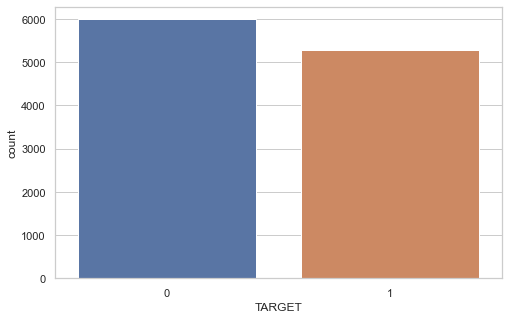

In [81]:
# visualistaion where 0 is not Predicted and 1 is Prospective Predictions
sns.countplot(x="TARGET",data=model_data)

In [82]:
model_data.groupby('TARGET').size()

TARGET
0    5989
1    5289
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243520434F0>,
      dtype=object)

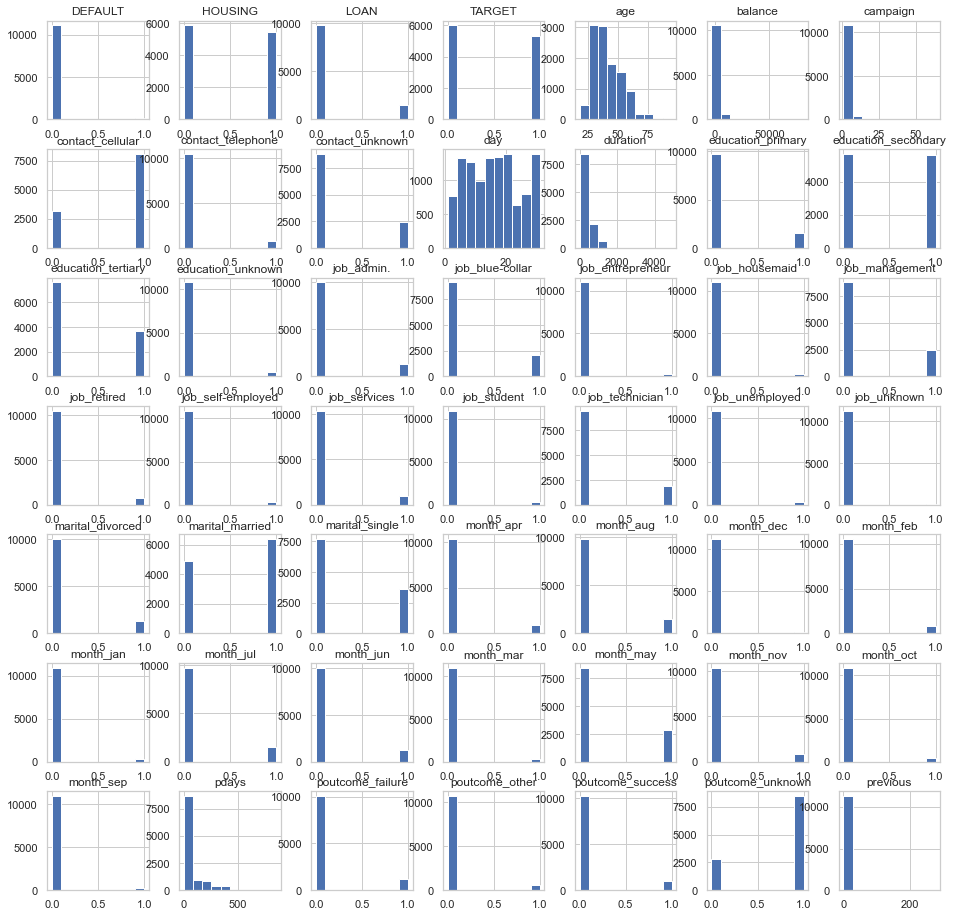

In [83]:
plt.rcParams['figure.figsize'] = (16, 16)
model_data.hist()

In [84]:
#measures of central tendencies - investigating the difference between the averages of independent variables vs the target variables
model_data.groupby('TARGET').mean()

,age,balance,day,duration,campaign,pdays,previous,DEFAULT,HOUSING,LOAN,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
TARGET,,,,,,,,,,,,,,,,,,,,,
0,40.64201,1291.244281,15.920354,224.675906,2.832860,35.736684,0.562030,0.018200,0.581733,0.171147,...,0.117048,0.005009,0.323760,0.085490,0.011855,0.009184,0.100852,0.041910,0.013525,0.843713
1,41.67007,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354,0.009832,0.365854,0.091511,...,0.103233,0.046890,0.174891,0.076196,0.061070,0.050860,0.116846,0.058045,0.184912,0.640197


Text(0, 0.5, 'Frequency')

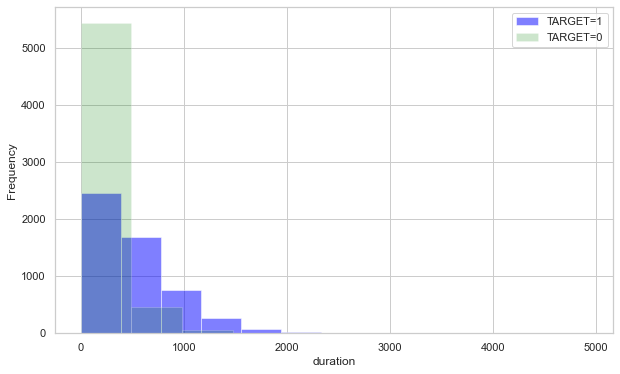

In [85]:
#Most of the customers in this dataset are in the age range of 40–50.
plt.figure(figsize=(10,6))
model_data[model_data['TARGET']==1]['duration'].hist(alpha=0.5,color='blue',
                                              bins=10,label='TARGET=1')
model_data[model_data['TARGET']==0]['duration'].hist(alpha=0.2,color='green',
                                              bins=10,label='TARGET=0')
plt.legend()
plt.xlabel('duration')
plt.ylabel('Frequency')

In [86]:
model_data.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
TARGET                 0
DEFAULT                0
HOUSING                0
LOAN                   0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0


In [87]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11278 non-null  int64
 1   balance              11278 non-null  int64
 2   day                  11278 non-null  int64
 3   duration             11278 non-null  int64
 4   campaign             11278 non-null  int64
 5   pdays                11278 non-null  int64
 6   previous             11278 non-null  int64
 7   TARGET               11278 non-null  int64
 8   DEFAULT              11278 non-null  int64
 9   HOUSING              11278 non-null  int64
 10  LOAN                 11278 non-null  int64
 11  job_admin.           11278 non-null  uint8
 12  job_blue-collar      11278 non-null  uint8
 13  job_entrepreneur     11278 non-null  uint8
 14  job_housemaid        11278 non-null  uint8
 15  job_management       11278 non-null  uint8
 16  job_retired          1

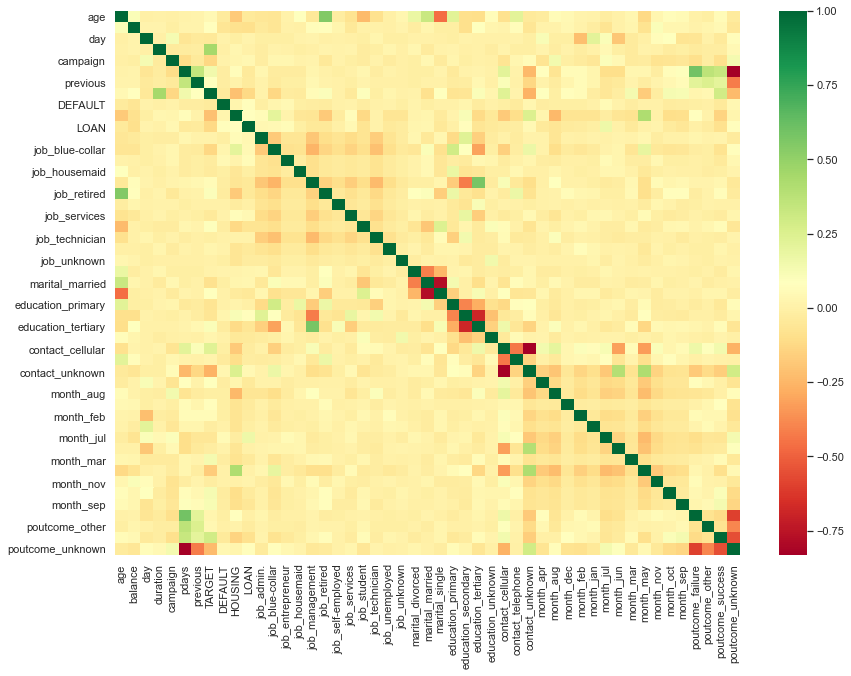

In [88]:
#correlation plot
plt.figure(figsize=(14,10))
corr = model_data.corr()
sns.heatmap(corr, cmap='RdYlGn')

In [89]:
print (corr['TARGET'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['TARGET'].sort_values(ascending=False)[-5:]) #last 5 values

TARGET                1.000000
duration              0.447002
poutcome_success      0.293218
contact_cellular      0.228379
pdays                 0.151997
month_mar             0.134790
month_oct             0.133758
month_sep             0.124509
education_tertiary    0.106286
job_retired           0.105577
job_student           0.098222
previous              0.087806
marital_single        0.085826
month_apr             0.085136
balance               0.079618
Name: TARGET, dtype: float64 

----------------------
campaign           -0.129335
month_may          -0.170679
HOUSING            -0.215627
poutcome_unknown   -0.234011
contact_unknown    -0.261148
Name: TARGET, dtype: float64


# Feature Selection

In [90]:
model_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'TARGET', 'DEFAULT', 'HOUSING', 'LOAN', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [91]:
model_data.shape

(11278, 49)

In [92]:
features = model_data[model_data.columns.difference(['TARGET','age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
                                                    'DEFAULT', 'HOUSING', 'LOAN', 'job_admin.', 'job_blue-collar',
                                                   'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
                                                   'job_self-employed', 'job_services', 'job_student', 'job_technician',
                                                   'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
                                                   'marital_single', 'education_primary', 'education_secondary',
                                                   'education_tertiary', 'education_unknown', 'contact_cellular',
                                                   'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
                                                   'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
                                                   'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
                                                   'poutcome_failure', 'poutcome_other', 'poutcome_success',
                                                   'poutcome_unknown'])]
labels = model_data['TARGET']

In [93]:
features.shape

(11278, 0)

## WOE and IV

In [94]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [95]:
# variable
features = model_data.drop("TARGET",axis=1) #independent columns
labels = model_data["TARGET"] #target column

In [96]:
# how many independent columns after using one hotcode
len(features.columns)

48

# Variable Importance using Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(features,labels)

pred = rf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred,labels)
print(accuracy)

1.0


In [98]:
from pandas import DataFrame
VI = DataFrame(rf.feature_importances_, columns = ["RF"], index=features.columns)

In [99]:
VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0).head(20)

,index,RF
3,duration,0.322443
1,balance,0.078737
0,age,0.075408
2,day,0.067654
4,campaign,0.036283
46,poutcome_success,0.035357
5,pdays,0.035033
8,HOUSING,0.028569
31,contact_unknown,0.021712
6,previous,0.020726


# Recursive Feature Elimination

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

In [101]:
# put into data frame
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [102]:
Selected[Selected['RFE'] == True].head(20)

,index,RFE
8,HOUSING,True
9,LOAN,True
13,job_housemaid,True
15,job_retired,True
18,job_student,True
29,contact_cellular,True
31,contact_unknown,True
33,month_aug,True
34,month_dec,True
36,month_jan,True


# Variable Importance using Extratrees Classifier

In [103]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[0.07115697 0.07044235 0.07331037 0.24448892 0.05126942 0.01782459
 0.0129687  0.00343527 0.03162921 0.01517252 0.01022641 0.01064478
 0.00458094 0.00451905 0.01060887 0.00776568 0.0052904  0.0078801
 0.00567412 0.0112683  0.00509577 0.00115808 0.00754309 0.01079799
 0.00985347 0.00805813 0.01194878 0.01071137 0.00521802 0.01990982
 0.00499029 0.03042176 0.01243427 0.01419481 0.00322595 0.00884225
 0.00613739 0.0110953  0.01291312 0.01313374 0.0128955  0.00968498
 0.01233845 0.00834679 0.00691087 0.00498525 0.04629555 0.02070223]


In [104]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [105]:
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0).head(20)

,index,Extratrees
3,duration,0.244489
2,day,0.073310
0,age,0.071157
1,balance,0.070442
4,campaign,0.051269
46,poutcome_success,0.046296
8,HOUSING,0.031629
31,contact_unknown,0.030422
47,poutcome_unknown,0.020702
29,contact_cellular,0.019910


# Chi Square

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [107]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [108]:
chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0).head(20)

,index,Chi_Square
3,duration,739298.78
1,balance,415545.03
5,pdays,56503.06
6,previous,1226.65
46,poutcome_success,878.60
31,contact_unknown,604.37
4,campaign,535.89
8,HOUSING,272.42
40,month_may,245.11
39,month_mar,199.85


# L1 feature selection

In [109]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [110]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True].head(20)

,index,L1
0,age,True
1,balance,True
2,day,True
3,duration,True
4,campaign,True
5,pdays,True
8,HOUSING,True
9,LOAN,True
10,job_admin.,True
11,job_blue-collar,True


# LightGBM or XGBoost

In [111]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40,penalty="lgbmc", dual=False).fit(features, labels)
model = SelectFromModel(lgbmc,prefit=True)

In [112]:
from pandas import DataFrame
lgmc = DataFrame(model.get_support(), columns = ["LGBMC"], index=features.columns)
lgmc = lgmc.reset_index()
lgmc[lgmc['LGBMC'] == True].head(20)

,index,LGBMC
0,age,True
1,balance,True
2,day,True
3,duration,True
4,campaign,True
5,pdays,True


# Combine all together

In [113]:
from functools import reduce
dfs = [VI, Selected, FI, chi_sq, l1,lgmc]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

# Vote each variable

In [114]:
columns = ['RF', 'Extratrees','Chi_Square','LGBMC']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(7,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)
#score_table['LGBMC'] = final_results['LGBMC'].astype(int)

In [115]:
score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

,index,RF,Extratrees,Chi_Square,LGBMC,RFE,L1,final_score
1,balance,1,1,1,1,0,1,5
46,poutcome_success,1,1,1,0,1,1,5
3,duration,1,1,1,1,0,1,5
4,campaign,1,1,1,1,0,1,5
5,pdays,1,0,1,1,0,1,4
0,age,1,1,0,1,0,1,4
2,day,1,1,0,1,0,1,4
8,HOUSING,0,1,0,0,1,1,3
31,contact_unknown,0,0,1,0,1,1,3
43,month_sep,0,0,0,0,1,1,2


In [116]:
score_table.shape

(48, 8)

# Multicollinearity

In [117]:
model_data.shape

(11278, 49)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [119]:
features = features[list(score_table[score_table['final_score'] >= 3]['index'])]

In [120]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [121]:
list(vif['Features'])

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'HOUSING',
 'contact_unknown',
 'poutcome_success']

In [122]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               11278 non-null  int64
 1   balance           11278 non-null  int64
 2   day               11278 non-null  int64
 3   duration          11278 non-null  int64
 4   campaign          11278 non-null  int64
 5   pdays             11278 non-null  int64
 6   HOUSING           11278 non-null  int64
 7   contact_unknown   11278 non-null  uint8
 8   poutcome_success  11278 non-null  uint8
dtypes: int64(7), uint8(2)
memory usage: 638.9 KB


In [123]:
features.describe()

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success
count,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00
mean,41.12,1531.83,15.56,371.28,2.51,51.20,0.48,0.21,0.09
std,11.88,3215.70,8.41,349.02,2.67,108.24,0.50,0.41,0.29
min,18.00,-3058.00,1.00,0.00,1.00,-1.00,0.00,0.00,0.00
25%,32.00,118.00,8.00,140.00,1.00,-1.00,0.00,0.00,0.00
50%,39.00,550.00,15.00,253.00,2.00,-1.00,0.00,0.00,0.00
75%,49.00,1693.00,21.00,496.75,3.00,8.00,1.00,0.00,0.00
max,95.00,81204.00,31.00,4918.00,63.00,854.00,1.00,1.00,1.00


In [124]:
features.head(5)

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success
0,59,2343,5,1042,1,-1,1,1,0
1,56,45,5,1467,1,-1,0,1,0
2,41,1270,5,1389,1,-1,1,1,0
3,55,2476,5,579,1,-1,1,1,0
4,54,184,5,673,2,-1,0,1,0


# Descriptive Stats and Visualization - For selected variables

In [125]:
#Merge the best list to churn variable
final_vars = list(vif['Features']) + ['TARGET']

In [126]:
df1 = model_data[final_vars].fillna(0)

In [127]:
df1.describe()

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success,TARGET
count,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00,11278.00
mean,41.12,1531.83,15.56,371.28,2.51,51.20,0.48,0.21,0.09,0.47
std,11.88,3215.70,8.41,349.02,2.67,108.24,0.50,0.41,0.29,0.50
min,18.00,-3058.00,1.00,0.00,1.00,-1.00,0.00,0.00,0.00,0.00
25%,32.00,118.00,8.00,140.00,1.00,-1.00,0.00,0.00,0.00,0.00
50%,39.00,550.00,15.00,253.00,2.00,-1.00,0.00,0.00,0.00,0.00
75%,49.00,1693.00,21.00,496.75,3.00,8.00,1.00,0.00,0.00,1.00
max,95.00,81204.00,31.00,4918.00,63.00,854.00,1.00,1.00,1.00,1.00


In [128]:
df1.head()

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success,TARGET
0,59,2343,5,1042,1,-1,1,1,0,1
1,56,45,5,1467,1,-1,0,1,0,1
2,41,1270,5,1389,1,-1,1,1,0,1
3,55,2476,5,579,1,-1,1,1,0,1
4,54,184,5,673,2,-1,0,1,0,1


In [129]:
df1.shape

(11278, 10)

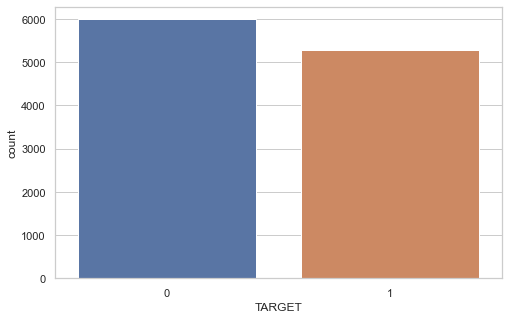

In [130]:
plt.rcParams['figure.figsize'] = (8, 5)
# visualistaion where 0 is not Predicted and 1 is Prospective Predictions
sns.countplot(x="TARGET",data=df1)

([<matplotlib.axis.XTick at 0x24350cb1400>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'balance'),
  Text(0, 0, 'day'),
  Text(0, 0, 'duration'),
  Text(0, 0, 'campaign'),
  Text(0, 0, 'pdays'),
  Text(0, 0, 'HOUSING'),
  Text(0, 0, 'contact_unknown'),
  Text(0, 0, 'poutcome_success'),
  Text(0, 0, 'TARGET')])

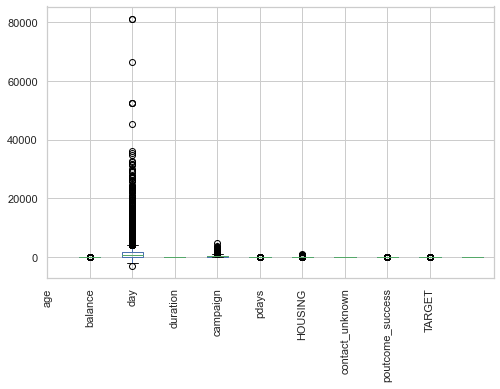

In [131]:
#ploting box plot to see Outliers
df1.plot.box()
plt.xticks(list(range(len(df1.columns))), df1.columns, rotation="vertical")

# Validation

In [132]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, test_size=0.20, random_state=0)

#train = train.reset_index(drop=True)
#test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])] #X_train
label_train = train['TARGET']                  #y_train
features_test = test[list(vif['Features'])]   #X_test
label_test = test['TARGET']                    #y_test

In [133]:
all_features = pd.concat([features_train, features_test]) #X
all_labels = pd.concat([label_train, label_test])         #y

In [134]:
X = df1.drop('TARGET',axis=1)
y= df1['TARGET']

from sklearn.model_selection import train_test_split #importing libary
#spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [135]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'HOUSING',
       'contact_unknown', 'poutcome_success'],
      dtype='object')

In [136]:
#implement cross validation, the cross_val_score method of the sklearn.model_selection library can be used. 
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=42) 

In [137]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=classifier, X=features_train, y=label_train, cv=10)  
print(all_accuracies) 
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 
#Finally let's find the standard deviation of the data to see degree of variance in the results obtained by our model. To do so, call the std() method on the all_accuracies object
print(all_accuracies.std()) 

[0.80730897 0.82392027 0.79379157 0.81374723 0.83148559 0.8248337
 0.80820399 0.83592018 0.81485588 0.83924612]
0.8193313493086606
0.01357458999398198


# Model cross validation

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Spot Check Algorithms: a list of the models we are going to use

models = []

models.append(('LR', LogisticRegression()))

models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))

models.append(('DT', DecisionTreeClassifier()))

models.append(('classifier', RandomForestClassifier()))

models.append(('NB', GaussianNB()))

models.append(('SV', SVC()))

models.append(('NN', MLPClassifier()))

models.append(('GB', GradientBoostingClassifier()))

print(models)


[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()), ('classifier', RandomForestClassifier()), ('NB', GaussianNB()), ('SV', SVC()), ('NN', MLPClassifier()), ('GB', GradientBoostingClassifier())]


# Cross Validation

In [139]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
 
# K-Folds, 
seed = 42
results = []

names = []

for name, model in models:

                kfold = model_selection.KFold(n_splits=10, random_state=seed)

                cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1")

                results.append(cv_results)

                names.append(name)

                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

                print(msg)

LR: 0.766417 (0.021741)
LDA: 0.752194 (0.012201)
KNN: 0.729428 (0.019700)
DT: 0.729374 (0.011392)
classifier: 0.816124 (0.009479)
NB: 0.679461 (0.017031)
SV: 0.689448 (0.022745)
NN: 0.715215 (0.107530)
GB: 0.815202 (0.006778)


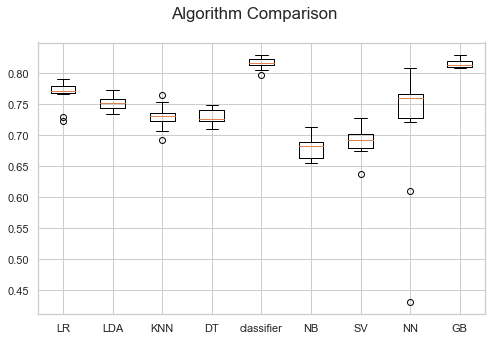

In [140]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Model

## KNeighbors 

In [141]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 82.22%
rf Test accuracy is = 73.67%
F1 Training set accuracy: 0.806
F1 Test set accuracy: 0.720


In [142]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[898 263]
 [331 764]]


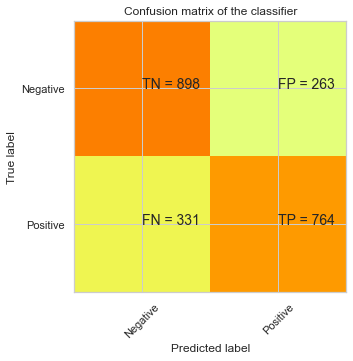

In [143]:
plt.rcParams['figure.figsize'] = (8, 5)
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [144]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1161
           1       0.74      0.70      0.72      1095

    accuracy                           0.74      2256
   macro avg       0.74      0.74      0.74      2256
weighted avg       0.74      0.74      0.74      2256
 



In [145]:
plt.rcParams['figure.figsize'] = (8, 5)
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = knn.predict_proba(features_train)[:,1]
preds = knn.predict_proba(X_train)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [146]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = knn.predict_proba(features_test)[:,1]
preds = knn.predict_proba(X_test)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

## Randomforest

In [147]:
#classifier = RandomForestClassifier(random_state=7, max_features ='auto',max_depth= 17,min_samples_split =2,min_samples_leaf=3,bootstrap=True) #n_estimators=5, 

classifier = RandomForestClassifier()
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
#max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]
classifier.fit(X_train,y_train)

pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 100.00%
rf Test accuracy is = 80.81%
F1 Training set accuracy: 1.000
F1 Test set accuracy: 0.805


In [148]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[931 230]
 [203 892]]


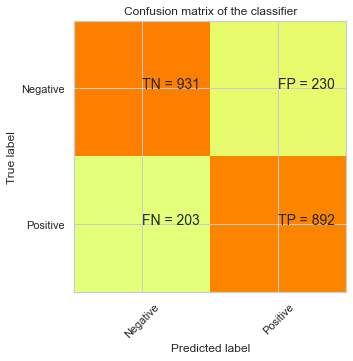

In [149]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [150]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1161
           1       0.80      0.81      0.80      1095

    accuracy                           0.81      2256
   macro avg       0.81      0.81      0.81      2256
weighted avg       0.81      0.81      0.81      2256
 



In [151]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = classifier.predict_proba(features_train)[:,1]
preds = classifier.predict_proba(X_train)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [152]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = classifier.predict_proba(features_test)[:,1]
preds = classifier.predict_proba(X_test)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [153]:
#feature importance 
print(sorted(zip(map(lambda X:X , classifier.feature_importances_ ),X)))

[(0.0377323698095932, 'HOUSING'), (0.04236542485749209, 'contact_unknown'), (0.045268558427092105, 'campaign'), (0.05424854284791599, 'poutcome_success'), (0.06478938827487872, 'pdays'), (0.09766767810073712, 'day'), (0.11562863998568457, 'age'), (0.1323199034819806, 'balance'), (0.40997949421462565, 'duration')]


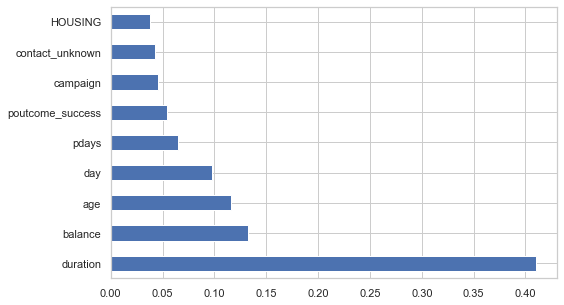

In [154]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Decision Tree

In [155]:
DT = DecisionTreeClassifier(max_depth=13,random_state=40, criterion= "entropy", min_samples_split=9, splitter='best')

DT.fit(X_train,y_train)

pred_train = DT.predict(X_train)
pred_test = DT.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 87.77%
rf Test accuracy is = 78.01%
F1 Training set accuracy: 0.869
F1 Test set accuracy: 0.774


In [156]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[912 249]
 [247 848]]


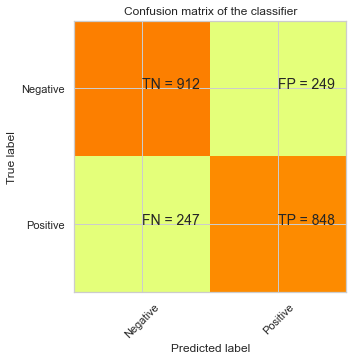

In [157]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [158]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1161
           1       0.77      0.77      0.77      1095

    accuracy                           0.78      2256
   macro avg       0.78      0.78      0.78      2256
weighted avg       0.78      0.78      0.78      2256
 



In [159]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = DT.predict_proba(features_train)[:,1]
preds = DT.predict_proba(X_train)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [160]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = DT.predict_proba(features_test)[:,1]
preds = DT.predict_proba(X_test)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)

auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

# Naive Bayes

In [161]:
nb = GaussianNB()

nb.fit(X_train,y_train)

pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('rf Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('rf Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

rf Train accuracy is = 74.06%
rf Test accuracy is = 73.54%
F1 Training set accuracy: 0.679
F1 Test set accuracy: 0.687


In [162]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[1005  156]
 [ 441  654]]


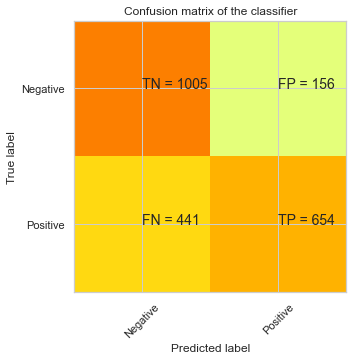

In [163]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [164]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1161
           1       0.81      0.60      0.69      1095

    accuracy                           0.74      2256
   macro avg       0.75      0.73      0.73      2256
weighted avg       0.75      0.74      0.73      2256
 



In [165]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = nb.predict_proba(features_train)[:,1]
preds = nb.predict_proba(X_train)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [166]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = nb.predict_proba(features_test)[:,1]
preds = nb.predict_proba(X_test)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

# Neural network

In [167]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

nn.fit(X_train,y_train)

pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
#accuracy = nn.score(X_test, y_test)
print('Train accuracy is = {:.2f}%'.format(accuracy_train*100))

accuracy_test = accuracy_score(pred_test,y_test)
#accuracy = nn.score(X_test, y_test)
print('Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

Train accuracy is = 80.38%
Test accuracy is = 77.97%
F1 Training set accuracy: 0.808
F1 Test set accuracy: 0.792


In [168]:
#check confusion matrix
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
con_mat=confusion_matrix(y_test, pred_test)
print (confusion_matrix(y_test, pred_test))

[[811 350]
 [147 948]]


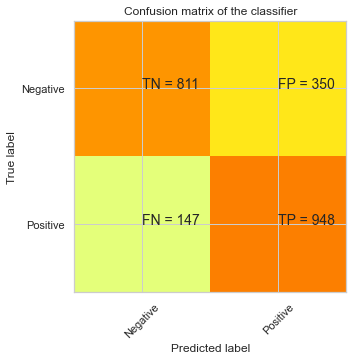

In [169]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [170]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1161
           1       0.73      0.87      0.79      1095

    accuracy                           0.78      2256
   macro avg       0.79      0.78      0.78      2256
weighted avg       0.79      0.78      0.78      2256
 



# Gradient Boosting

In [171]:
from sklearn.neural_network import MLPClassifier
gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)

pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

#from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
print('gb Train accuracy is = {:.2f}%'.format(accuracy_train*100))
accuracy_test = accuracy_score(pred_test,y_test)
print('gb Test accuracy is = {:.2f}%'.format(accuracy_test*100))

print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

gb Train accuracy is = 83.85%
gb Test accuracy is = 80.85%
F1 Training set accuracy: 0.829
F1 Test set accuracy: 0.804


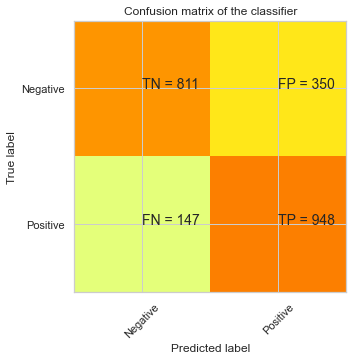

In [172]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [173]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1161
           1       0.80      0.81      0.80      1095

    accuracy                           0.81      2256
   macro avg       0.81      0.81      0.81      2256
weighted avg       0.81      0.81      0.81      2256
 



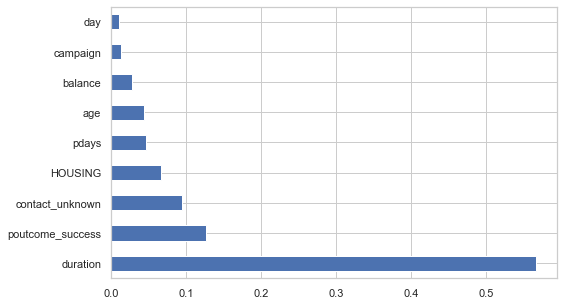

In [174]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [175]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=gb, X=X_train, y=y_train, cv=10)
print(all_accuracies) 
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 

[0.8316722  0.81727575 0.80931264 0.81818182 0.83259424 0.82594235
 0.8248337  0.845898   0.82372506 0.82594235]
0.8255378106484177


In [176]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = gb.predict_proba(features_train)[:,1]
preds = gb.predict_proba(X_train)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [177]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = gb.predict_proba(features_test)[:,1]
preds = gb.predict_proba(X_test)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

# Parameter Tuning (Random Forest Classifier) 
instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

In [178]:
#RandomForest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# The scorers can be either be one of the predefined metric strings or a scorer
scoring = {'fbeta_score': make_scorer(fbeta_score,beta=1,average='binary')}

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                               scoring=scoring, refit='fbeta_score', #n_iter = 20, 
                               cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

#To find the best accuracy achieved, execute the following code:
best_result = rf_random.best_score_  
print(best_result)

print(rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.5s finished


0.8203627847141108
{'n_estimators': 267, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [179]:
from sklearn.ensemble import RandomForestClassifier
rfp = RandomForestClassifier(**rf_random.best_params_)

rfp.fit(X_train,y_train)

pred_train = rfp.predict(X_train)
pred_test = rfp.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), rfp.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), rfp.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

0.9023498115717136 0.8045212765957447 0.974904131795175 0.8903826413224311
F1 Training set accuracy: 0.897
F1 Test set accuracy: 0.802


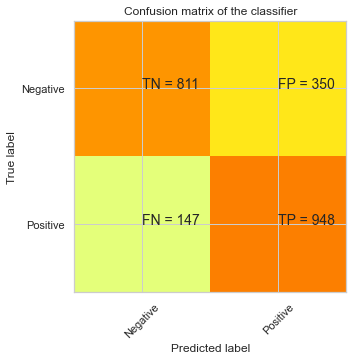

In [180]:
#Display an image, i.e. data on a 2D regular raster
plt.imshow(con_mat, cmap=plt.cm.Wistia)
#define class name in data
classNames = ['Negative','Positive']
#set title
plt.title('Confusion matrix of the classifier')
#set y and x lable
plt.ylabel('True label')
plt.xlabel('Predicted label')
# set number of ticks (here we need 2 ticks as we have 2 classes)
tick_marks = np.arange(len(classNames))
# set name for each tick
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# insert text in each cell of matrix
s = [['TN','FP'], 
     ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(con_mat[i][j]))
plt.show()

In [181]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1161
           1       0.79      0.82      0.80      1095

    accuracy                           0.80      2256
   macro avg       0.80      0.80      0.80      2256
weighted avg       0.81      0.80      0.80      2256
 



In [182]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = rfp.predict_proba(features_train)[:,1]
preds = rfp.predict_proba(X_train)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [183]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = rfp.predict_proba(features_test)[:,1]
preds = rfp.predict_proba(X_test)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [184]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=rfp, X=features_train, y=label_train, cv=10)
print(all_accuracies) 
#find the average of all the accuracies, simple use the mean() method of the object returned by cross_val_score
print(all_accuracies.mean()) 

[0.81727575 0.82059801 0.8037694  0.81596452 0.82039911 0.827051
 0.80709534 0.83481153 0.81818182 0.84035477]
0.8205501248609586


## Parameter Tuning(Decision Tree)
### Gradient Boosting

In [185]:
# Decision Tree

# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# The scorers can be either be one of the predefined metric strings or a scorer
scoring = {'fbeta_score': make_scorer(fbeta_score,beta=1,average='binary')}

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [7, None],
              #"max_features": randint(1, 13),
              #"min_samples_leaf": randint(1, 13),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
#tree1=GradientBoostingClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = GridSearchCV(tree, param_dist,scoring=scoring,refit='fbeta_score', cv=10)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7}
Best score is 0.8063738577263742


In [186]:
#from sklearn.ensemble import DecisionTreeClassifier
tree = DecisionTreeClassifier(**tree_cv.best_params_)
#tree = DecisionTreeClassifier(max_depth=12,  min_samples_leaf =1, criterion = 'gini', max_features = 11)
#'criterion': 'gini', 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 1, n_estimators= 50,
tree.fit(X_train,y_train)

pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), tree.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), tree.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

0.8303037020616272 0.787677304964539 0.9051495923280151 0.8580022732725292
F1 Training set accuracy: 0.825
F1 Test set accuracy: 0.790


In [187]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1161
           1       0.76      0.82      0.79      1095

    accuracy                           0.79      2256
   macro avg       0.79      0.79      0.79      2256
weighted avg       0.79      0.79      0.79      2256
 



In [188]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = tree.predict_proba(features_train)[:,1]
preds = tree.predict_proba(X_train)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [189]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = tree.predict_proba(features_test)[:,1]
preds = tree.predict_proba(X_test)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

## Gradient Boosting - Hyper parameter tuning

In [190]:
## from sklearn import cross_validation, metrics   
#from sklearn.grid_search import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 12, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf}

#gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, y_train)

print(gf_tune.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.6min finished


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}


In [191]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(**gf_tune.best_params_)

gb.fit(X_train,y_train)

pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,y_train)
accuracy_test = accuracy_score(pred_test,y_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), gb.predict_proba(X_train)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(y_test), gb.predict_proba(X_test)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)
print("F1 Training set accuracy: {:.3f}".format(fbeta_score(y_train, pred_train, beta=1)))
print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y_test, pred_test, beta=1)))

0.9996674794945688 0.8071808510638298 0.9999998518418429 0.8817316201196418
F1 Training set accuracy: 1.000
F1 Test set accuracy: 0.802


In [192]:
# importing classification_report library
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test),'\n')

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1161
           1       0.80      0.80      0.80      1095

    accuracy                           0.81      2256
   macro avg       0.81      0.81      0.81      2256
weighted avg       0.81      0.81      0.81      2256
 



In [193]:
import bokeh
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = gb.predict_proba(features_train)[:,1]
preds = gb.predict_proba(X_train)[:,1]
#fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [194]:
#from bokeh.charts import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
#preds = gb.predict_proba(features_test)[:,1]
preds = gb.predict_proba(X_test)[:,1]

#fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
fpr, tpr, _ = metrics.roc_curve(np.array(y_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

# Final Model and Model Performance 

In [195]:
#Train the final model on all the dataset
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()

rfp.fit(X, y)

pred_train = rfp.predict(X)
# predict test set
#pred_test= clf.predict(y)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train, y)
#accuracy_test = accuracy_score(pred_test, y)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(y), rfp.predict_proba(X)[:,1])
auc_train = metrics.auc(fpr,tpr)


print(accuracy_train,auc_train)
print("F1 Train set accuracy: {:.3f}".format(fbeta_score(y, pred_train, beta=1)))
#print("F1 Test set accuracy: {:.3f}".format(fbeta_score(y, pred_test, beta=1)))

0.9020216350416741 0.9744047360287835
F1 Train set accuracy: 0.897


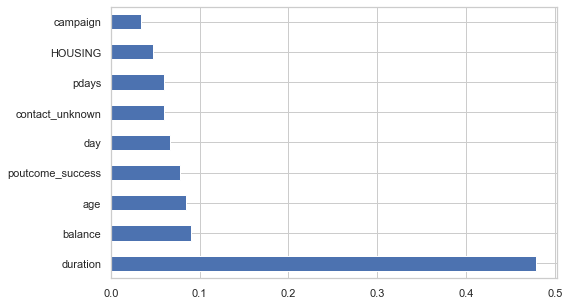

In [196]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(rfp.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#  Save Best Model

In [198]:
import pickle

Pkl_Filename = "predict_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rfp, file)

# Exploration Of Test Dataset

In [199]:
Score_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'TARGET', 'DEFAULT', 'HOUSING', 'LOAN', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [200]:
df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'HOUSING',
       'contact_unknown', 'poutcome_success', 'TARGET'],
      dtype='object')

In [201]:
#Prepare score data to ensure the attributes of the modelling data matches that of the scoring data
#Score_data

#replace missing values with most frequent values
Score_data_sel = Score_data.fillna(Score_data.mode().iloc[0])

#Select features and target
Score_data_sel = Score_data_sel[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'HOUSING','contact_unknown', 'poutcome_success']]


In [202]:
Score_data_sel.head()

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success
32166,47,2290,15,54,1,-1,0,0,0
25461,58,8014,19,697,2,184,1,0,0
14668,35,313,15,479,1,-1,1,0,0
36759,26,38,12,119,1,294,1,0,0
27665,33,3495,21,11,2,-1,1,0,0


In [203]:
Score_data_sel.shape

(33933, 9)

In [204]:
Score_data_sel.dtypes

age                 int64
balance             int64
day                 int64
duration            int64
campaign            int64
pdays               int64
HOUSING             int64
contact_unknown     uint8
poutcome_success    uint8
dtype: object

### load the saved model

# Use the code to load the model
filename = 'predict_model'

from sklearn.externals import joblib
rfp=joblib.load(filename)

In [205]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_rfp = pickle.load(file)

Pickled_rfp

RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=267)

In [206]:
def score_new(Score_data_sel,rfp):
    score = pd.DataFrame(rfp.predict_proba(Score_data_sel)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),11,labels=range(11,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    return(score)

In [207]:
scores = score_new(Score_data_sel,rfp)
scores

,SCORE,DECILE
0,0.05,8.00
1,0.72,1.00
2,0.62,2.00
3,0.12,6.00
4,0.01,11.00
...,...,...
33928,0.02,10.00
33929,0.03,9.00
33930,0.77,1.00
33931,0.01,11.00


In [208]:
# How many 0s and 1s are there

print('There are', np.count_nonzero(pred_train == 0), '0s')

print('There are', np.count_nonzero(pred_train == 1), '1s')

There are 5812 0s
There are 5466 1s


# Fit the model

In [209]:
#Score the final model (RandomForest) 
pred = rfp.predict(Score_data_sel)
pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [210]:
# Probability for Test Data Set
proba = rfp.predict_proba(Score_data_sel)
proba

array([[0.94836544, 0.05163456],
       [0.27744066, 0.72255934],
       [0.37547057, 0.62452943],
       ...,
       [0.22818391, 0.77181609],
       [0.99038534, 0.00961466],
       [0.67365397, 0.32634603]])

In [211]:
# Creating Data Frame for prediction
prediction  = pd.DataFrame(pred)
prediction.head()

,0
0,0
1,1
2,1
3,0
4,0


In [212]:
# Prediction columns name came as "0"
# Lets rename  
prediction.rename(columns = {0: 'T'}, inplace = True)
prediction.head()

,T
0,0
1,1
2,1
3,0
4,0


In [213]:
prediction.tail()

,T
33928,0
33929,0
33930,1
33931,0
33932,0


In [214]:
#Concatenate reason and reason_
new_data = pd.concat([Score_data_sel, Target], axis=1)
new_data.head()

,age,balance,day,duration,campaign,pdays,HOUSING,contact_unknown,poutcome_success,age,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.00,2143.00,5.00,261.00,1.00,-1.00,1.00,1.00,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,33.00,2.00,5.00,76.00,1.00,-1.00,1.00,1.00,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,47.00,1506.00,5.00,92.00,1.00,-1.00,1.00,1.00,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,35.00,231.00,5.00,139.00,1.00,-1.00,1.00,1.00,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,28.00,447.00,5.00,217.00,1.00,-1.00,1.00,1.00,0.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [215]:
#scores.count()
#pred_train.count()
#Score_data.CustomerKey.count()
#Final.head(5)
#clf.predict_proba(features)
#clf.predict_proba(features)[:,1]
prob = scores[['SCORE']].values.squeeze()
prob

array([0.05163456, 0.72255934, 0.62452943, ..., 0.77181609, 0.00961466,
       0.32634603])

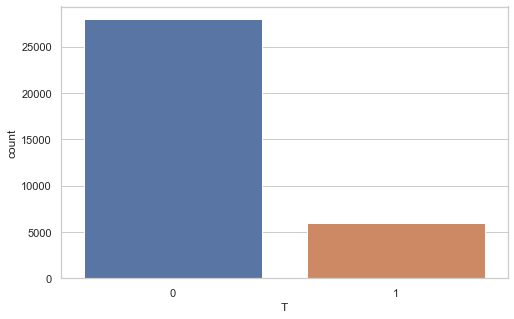

In [216]:
# visualistaion where 0 is not Churn and 1 is Churn Predicted
sns.countplot(x="T",data=prediction)

In [217]:
prediction.groupby("T").size()

T
0    27929
1     6004
dtype: int64